# Load Model

In [1]:
import openvino as ov

core = ov.Core()

model = core.read_model(model='Model/face-detection-adas-0001.xml')
compiled_model = core.compile_model(model = model, device_name= "CPU")

input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

print("Input shape:", input_layer.shape)
print("Output shape:", output_layer.shape)

Input shape: [1,3,384,672]
Output shape: [1,1,200,7]


# Preprocess new Input Data

### call image

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("data/angrywonie.png.")
print(image.shape)
#plt.imshow(cv2.cvtcolor(image, cv2.COLOR_BGR2RGB))

image_height, image_width, image_channels = image.shape
image = cv2.resize(image,(int(image_width/5), int(image_height/5)))
print(image.shape)

cv2.imshow("Image", image)
cv2.waitKey()
cv2.destroyAllWindows()

(480, 480, 3)
(96, 96, 3)


# Preprocess Data

In [3]:
import cv2
import numpy as np

def preprocess(image):
    N,input_channels,input_height, input_width = input_layer.shape
    
    resized_image = cv2.resize(image, (input_width, input_height))
    transposed_image = resized_image.transpose(2, 0, 1)
    input_image = np.expand_dims(transposed_image, 0 )
    
    return input_image 


In [4]:
input_image = preprocess(image)

print(image.shape)
print(input_image.shape)


(96, 96, 3)
(1, 3, 384, 672)


# Run Inference

In [5]:
results = compiled_model([input_image])[output_layer]

In [6]:
print(results.shape)

(1, 1, 200, 7)


In [7]:
print(np.round(results[0][0][0],2))

[0.   1.   1.   0.03 0.25 0.22 0.52]


# Postprocess

In [8]:
def find_faceboxes(image, results, confidence_threshold):
    results = results.squeeze()

    scores = results[:,2]
    boxes = results[:, -4:]

    face_boxes = boxes[scores >= confidence_threshold]
    scores = scores[scores >= confidence_threshold]

    image_h, image_w, image_channels = image.shape
    face_boxes = face_boxes*np.array([image_w, image_h, image_w, image_h])
    face_boxes = face_boxes.astype(np.int64)

    return face_boxes, scores

In [9]:
confidence_threshold = .02
face_boxes, scores = find_faceboxes(image, results, confidence_threshold)
print(face_boxes)

[[  3  24  20  49]
 [ 34  23  56  52]
 [ 69  15  94  69]
 [ 35  49  43  61]
 [ 59  19  80  59]
 [ 15  68  27  86]
 [ 72  14  91  47]
 [ 58  35  78  74]
 [ 60  27  73  44]
 [ 67  37  74  59]
 [ 53  -2  82  21]
 [ 73  29  88  64]
 [  0  24   5  36]
 [ 33  51  42  68]
 [ 55  11  81  40]
 [ 57  24  67  46]
 [ 80  36  90  52]
 [ 67  49  89  88]
 [ 71  36  78  61]
 [ 83  45 107  94]
 [ 85  14  93  40]
 [ 66  28  74  51]
 [ 64  28  70  44]
 [ 75  37  84  61]
 [ 33  56  40  71]
 [ 78  42  95  89]
 [ 76  70  95 100]
 [ 29  57  40  77]
 [ 68  36  71  45]
 [ 85  24  93  50]
 [ 87  61 102 108]
 [ 76  46  84  70]
 [ 35  60  39  69]
 [ 18  69  25  85]
 [ 80  16 108  67]
 [ 85  38  90  45]
 [ 66  38  68  45]
 [ 17  69  23  81]
 [ 34  46  41  56]
 [ 73  63  88  89]
 [  1  65  12  84]
 [ 13  45  27  57]
 [ 65  26  69  34]
 [ 29  73  38  92]
 [ 15  74  23  86]
 [ 24  44  34  58]
 [ 19  60  28  82]
 [ 36  57  42  71]
 [ 25  57  34  78]
 [ 36  51  39  57]
 [ 67  47  74  69]
 [ 87  37  94  52]
 [ 33  48  3

In [10]:
for i in range(len(face_boxes)):
    print(face_boxes[i])
    print(scores[i])


[ 3 24 20 49]
0.9999907
[34 23 56 52]
0.9911361
[69 15 94 69]
0.4844637
[35 49 43 61]
0.083713785
[59 19 80 59]
0.06491674
[15 68 27 86]
0.04823203
[72 14 91 47]
0.046187453
[58 35 78 74]
0.04467837
[60 27 73 44]
0.042244952
[67 37 74 59]
0.038073733
[53 -2 82 21]
0.03741755
[73 29 88 64]
0.036926936
[ 0 24  5 36]
0.03587845
[33 51 42 68]
0.034922965
[55 11 81 40]
0.033793412
[57 24 67 46]
0.033770792
[80 36 90 52]
0.03334547
[67 49 89 88]
0.032575436
[71 36 78 61]
0.032273594
[ 83  45 107  94]
0.032245412
[85 14 93 40]
0.03209773
[66 28 74 51]
0.032060508
[64 28 70 44]
0.03135642
[75 37 84 61]
0.031339467
[33 56 40 71]
0.031190425
[78 42 95 89]
0.031182367
[ 76  70  95 100]
0.030608367
[29 57 40 77]
0.030545376
[68 36 71 45]
0.030305902
[85 24 93 50]
0.03018822
[ 87  61 102 108]
0.030142838
[76 46 84 70]
0.029986132
[35 60 39 69]
0.029860483
[18 69 25 85]
0.029530255
[ 80  16 108  67]
0.029266516
[85 38 90 45]
0.028898807
[66 38 68 45]
0.028788038
[17 69 23 81]
0.028748546
[34 46 41 5

In [11]:
print(len(face_boxes))

101


In [12]:
print(scores)

[0.9999907  0.9911361  0.4844637  0.08371378 0.06491674 0.04823203
 0.04618745 0.04467837 0.04224495 0.03807373 0.03741755 0.03692694
 0.03587845 0.03492296 0.03379341 0.03377079 0.03334547 0.03257544
 0.03227359 0.03224541 0.03209773 0.03206051 0.03135642 0.03133947
 0.03119043 0.03118237 0.03060837 0.03054538 0.0303059  0.03018822
 0.03014284 0.02998613 0.02986048 0.02953026 0.02926652 0.02889881
 0.02878804 0.02874855 0.02853605 0.02821709 0.02793275 0.02772909
 0.02770531 0.02752149 0.02739809 0.02738868 0.02729624 0.02727457
 0.0272072  0.02682126 0.02676766 0.02667291 0.02667094 0.02620993
 0.02612819 0.02609099 0.02604005 0.02598784 0.02596173 0.02595807
 0.0258229  0.02566968 0.02552306 0.02543375 0.02525133 0.0250928
 0.02506131 0.02503228 0.02499054 0.02498861 0.02497166 0.02495389
 0.02494831 0.02493839 0.02488399 0.02476074 0.02474052 0.02463283
 0.02459984 0.02455018 0.02454666 0.02453241 0.02450429 0.02437185
 0.02434686 0.02430636 0.0242284  0.02422145 0.02418322 0.02418

In [13]:
def draw_faceboxes(images, face_boxes, scores):

    show_image = image.copy()

    for i in range(len(face_boxes)):

        xmin, ymin, xmax, ymax = face_boxes[i]
        cv2.rectangle(img=show_image, pt1=(xmin,ymin), pt2=(xmax,ymax), color=(0,200,0), thickness=2)

    return show_image

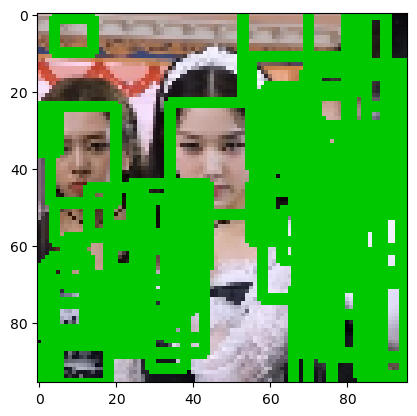

In [14]:
show_image = draw_faceboxes(image, face_boxes, scores)

plt.imshow(cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB))

In [15]:
cv2.imshow("Image", show_image)
cv2.waitKey()
cv2.destroyAllWindows()   